In [1]:
!pip install tensorflow

In [2]:
!pip install tqdm

In [3]:
from tqdm.notebook import tqdm, trange

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import ipywidgets as widgets
import nltk
nltk.download('stopwords')
from plotly.offline import init_notebook_mode
from ipywidgets import interact, interactive, fixed, interact_manual
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Humberto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
init_notebook_mode(connected = True)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
pd.set_option('display.max_colwidth', None)

In [8]:
data = pd.read_csv('full_join_mayflower_top_10.csv')
data

C:\Users\Humberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (17,24,25) have mixed types.Specify dtype option on import or set low_memory=False.



,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price.x,minimum_nights.x,maximum_nights.x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,available,price.y,adjusted_price,minimum_nights.y,maximum_nights.y
0,634424,https://www.airbnb.com/rooms/634424,20210705235432,2021-07-07,In the heart of San Gabriel Valley,"Private bedroom & bathroom available in 2 story house w/large window and natural light facing spacious backyard complete with gazebo and lush vegetation.Very close to Kaiser Permanente and perfect for the medical professional seeking proximity to workplace. Great for students who attend any of our local colleges including Cal Poly Pomona, Cal State LA, and Claremont Colleges. Also ideal for any traveler wishing to be in central location as close to downtown LA as it is to Pasadena or Long Beach.<br /><br /><b>The space</b><br />Room available: Bedroom. Separate private bath. Only shared when there are two simultaneous reservations. Clean, comfortable and chic in a contemporary single family home.<br /><br />Full use of kitchen, access to the lovely, whimsical garden. A great and peaceful place to read a book, work or simply relax. When in season, please help yourself to my pomegranates, lemons, figs, guavas and apples as well as any veggies or herbs growing in the garden.<br /><br />T","Quiet neighborhood. 5 min. drive to Metrolink station. 8-10 mile drive to beautiful waterfall hikes in the Sierra Madre Mountains. 25 min. from downtown LA, Pasadena, Santa Anita race track. Two blocks from Target shopping center. Near the 10 and 605 freeways. Local skiing and snowboarding in Mount Baldy and Big Bear both one and a half to 2 hours away. Perfect for guests traveling for business in the area. 35 miles east of Beverly Hills.",https://a0.muscache.com/pictures/miso/Hosting-634424/original/2a9037a5-2025-424e-96c7-f29c0b55cff5.jpeg,3159772,https://www.airbnb.com/users/show/3159772,Yolanda,2012-08-04,"Los Angeles, California, United States","My name is Yolanda. I'm a California native who enjoys traveling, art, good wine and food.\r\nI'm a friendly and honest person who takes pleasure in meeting new people. I know the city very well and I'm looking forward to welcoming you to my peaceful home.",within a few hours,100.0,50.0,False,https://a0.muscache.com/im/users/3159772/profile_pic/1344128669/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/3159772/profile_pic/1344128669/original.jpg?aki_policy=profile_x_medium,Baldwin Park,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",True,True,"Baldwin Park, California, United States",Baldwin Park,Other Cities,34.071100,-117.97292,Private room in house,Private room,2,NaN,1.5,1.0,1.0,"[""Oven"", ""Heating"", ""Stove"", ""Dishwasher"", ""Extra pillows and blankets"", ""Hair dryer"", ""Hot water"", ""Dishes

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241265 entries, 0 to 241264
Data columns (total 80 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            241265 non-null  int64  
 1   listing_url                                   241265 non-null  object 
 2   scrape_id                                     241265 non-null  int64  
 3   last_scraped                                  241265 non-null  object 
 4   name                                          241265 non-null  object 
 5   description                                   211700 non-null  object 
 6   neighborhood_overview                         129210 non-null  object 
 7   picture_url                                   241265 non-null  object 
 8   host_id                                       241265 non-null  int64  
 9   host_url                                      24

In [10]:
data = data.drop(columns=['listing_url', 'picture_url', 'host_url', 'host_picture_url', 'host_verifications', 'host_location', 'host_response_time', 'host_neighbourhood', 'host_name', 'host_about', 'host_acceptance_rate', 'host_total_listings_count', 'host_listings_count', 'host_is_superhost', 'neighbourhood_group_cleansed', 'neighbourhood', 'neighborhood_overview', 'calendar_last_scraped', 'date', 'last_scraped', 'license', 'bathrooms', 'calendar_updated', 'reviews_per_month', 'review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_accuracy', 'host_response_rate'])

In [11]:
data = data[data['adjusted_price'].notna()]

# SPLITS

In [12]:
df, validation_df  = train_test_split(data,
                                test_size=0.25,
                                random_state = 101)

In [13]:
df_train, df_test  = train_test_split(df,
                                test_size=0.25,
                                random_state = 101)

# EDA

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135709 entries, 65081 to 99959
Data columns (total 49 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            135709 non-null  int64  
 1   scrape_id                                     135709 non-null  int64  
 2   name                                          135709 non-null  object 
 3   description                                   119027 non-null  object 
 4   host_id                                       135709 non-null  int64  
 5   host_since                                    135275 non-null  object 
 6   host_thumbnail_url                            135275 non-null  object 
 7   host_has_profile_pic                          135275 non-null  object 
 8   host_identity_verified                        135275 non-null  object 
 9   neighbourhood_cleansed                       

In [15]:
df_train.describe()

,id,scrape_id,host_id,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price.x,minimum_nights.x,maximum_nights.x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,price.y,adjusted_price,minimum_nights.y,maximum_nights.y
count,1.357090e+05,1.357090e+05,1.357090e+05,135709.000000,135709.000000,135709.000000,133849.000000,125307.000000,134454.000000,135709.000000,135709.000000,135709.000000,135709.000000,135709.000000,135709.00000,135709.00000,135709.000000,135709.00000,135709.000000,135709.000000,135709.000000,135709.000000,135709.000000,135709.000000,135709.000000,109271.000000,135709.000000,135709.000000,135709.000000,135709.000000,135709.000000,135709.000000,135709.000000,135709.00000
mean,3.292460e+07,2.021071e+13,1.640705e+08,34.114567,-118.028328,3.089427,1.403462,1.523538,1.751067,117.796373,9.851336,636.997870,9.716666,9.935310,816.12613,816.12613,9.875319,816.12613,7.480720,21.029939,37.963201,144.384602,20.802320,6.683227,0.788150,4.586853,3.736944,1.245695,2.321821,0.169429,124.107664,124.033019,9.874901,816.12613
std,1.328024e+07,2.084773e+01,1.170373e+08,0.028468,0.029831,2.169476,0.762349,0.939928,1.280408,181.411354,34.879931,513.381096,34.895566,34.933963,468.39451,468.39451,34.911295,468.39451,10.267466,22.026201,34.158983,133.589154,36.283997,12.812244,1.629084,0.751719,4.103105,2.226754,3.581840,0.857493,201.905794,201.892822,34.924243,468.39451
min,6.344240e+05,2.021071e+13,4.992440e+05,34.045550,-118.080860,1.000000,0.000000,1.000000,0.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,1.000000,1.00000
25%,2.193980e+07,2.021071e+13,5.836474e+07,34.095500,-118.052540,2.000000,1.000000,1.000000,1.000000,50.000000,1.000000,31.000000,1.000000,1.000000,365.00000,365.00000,1.000000,365.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.500000,1.000000,0.000000,0.000000,0.000000,50.000000,50.000000,1.000000,365.00000
50%,3.479203e+07,2.021071e+13,1.448424e+08,34.114800,-118.030180,2.000000,1.000000,1.000000,1.000000,78.000000,2.000000,1125.000000,2.000000,2.000000,1125.00000,1125.00000,2.000000,1125.00000,1.000000,14.000000,37.000000,109.000000,6.000000,0.000000,0.000000,4.800000,2.000000,0.000000,1.000000,0.000000,80.000000,80.000000,2.000000,1125.00000
75%,4.527722e+07,2.021071e+13,2.614577e+08,34.136900,-118.010380,4.000000,1.500000,2.000000,2.000000,134.000000,7.000000,1125.000000,7.000000,7.000000,1125.00000,1125.00000,7.000000,1125.00000,13.000000,39.000000,69.000000,290.000000,22.000000,8.000000,1.000000,5.000000,5.000000,2.000000,3.000000,0.000000,135.000000,135.000000,7.000000,1125.00000
max,5.082753e+07,2.021071e+13,4.082149e+08,34.173310,-117.925880,12.000000,7.500000,5.000000,7.000000,3200.000000,730.000000,1125.000000,730.000000,730.000000,1125.00000,1125.00000,730.000000,1125.00000,30.000000,60.000000,90.000000,365.000000,248.000000,93.000000,12.000000,5.000000,38.000000,21.000000,38.000000,6.000000,3200.000000,3200.000000,730.000000,1125.00000


C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



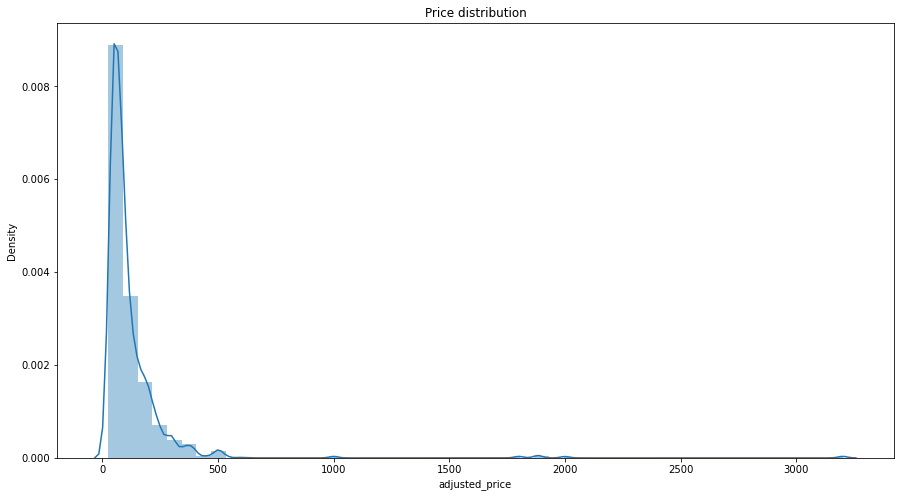

C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



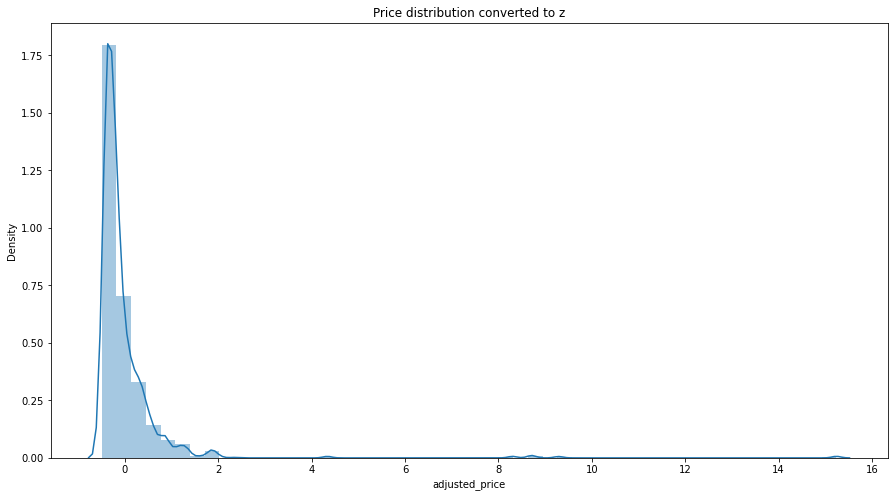

In [16]:
plt.figure(figsize = (15, 8))
sns.distplot(df_train['adjusted_price'])
plt.title('Price distribution')
plt.show()

plt.figure(figsize = (15, 8))
sns.distplot((df_train['adjusted_price']-np.mean(df_train['adjusted_price'])) / np.std(df_train['adjusted_price']))
plt.title('Price distribution converted to z')
plt.show()

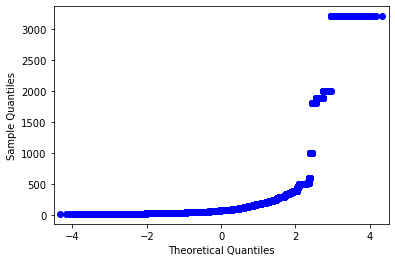

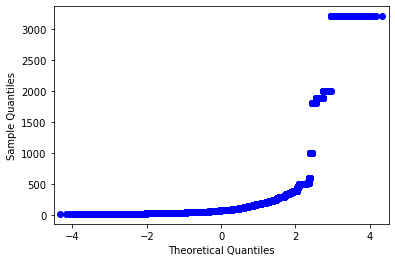

In [17]:
#qqplot
qqplot(df_train['adjusted_price'])

# Looks like price distribution is roughly Gaussian

In [18]:
df_train[df_train['bedrooms'] == 0].head()

,id,scrape_id,name,description,host_id,host_since,host_thumbnail_url,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price.x,minimum_nights.x,maximum_nights.x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,available,price.y,adjusted_price,minimum_nights.y,maximum_nights.y


<AxesSubplot:>

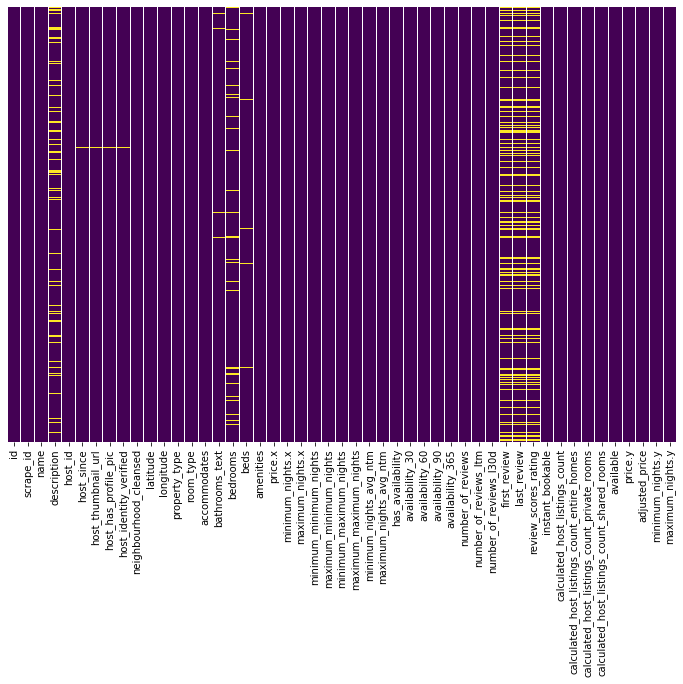

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Columns with a lot of missing data:

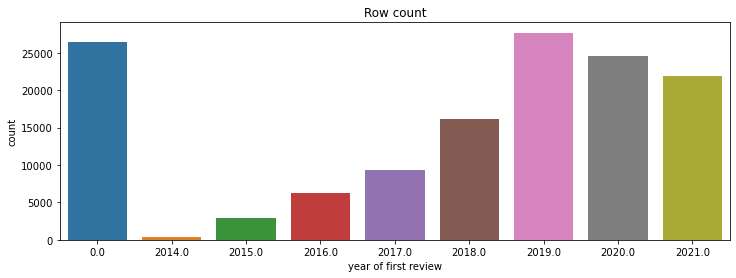

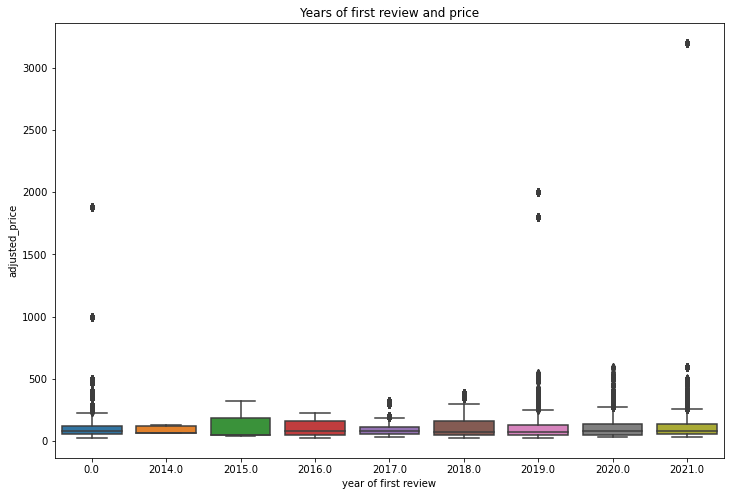

In [20]:
years_of_first_review = pd.DataFrame({
    'year of first review':pd.to_datetime(df_train['first_review'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'adjusted_price': df_train['adjusted_price']
})
plt.figure(figsize=(12,4))

sns.countplot(x="year of first review", data=years_of_first_review)
plt.title('Row count')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(data=years_of_first_review,orient='v', x = 'year of first review', y = 'adjusted_price')
plt.title('Years of first review and price')
plt.show()

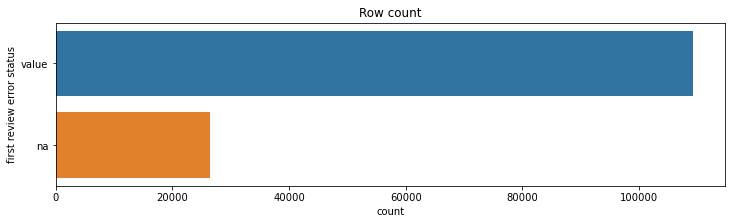

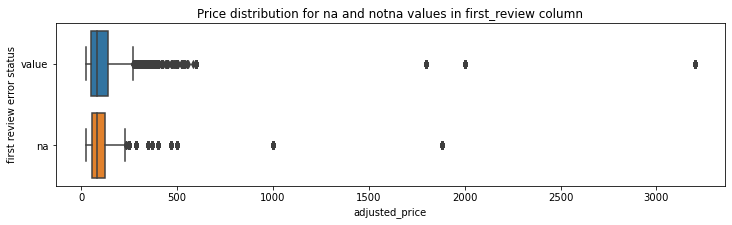

In [21]:
na_or_not = lambda x: 'na' if x else 'value'

first_review_error_status= pd.DataFrame({
    'first review error status':df_train['first_review'].isna().apply(na_or_not),
    'adjusted_price': df_train['adjusted_price']
})

plt.figure(figsize=(12,3))
sns.countplot(y='first review error status', data=first_review_error_status, orient='h')
plt.title('Row count')
plt.show()

plt.figure(figsize=(12,3))
sns.boxplot(data=first_review_error_status,orient='h', y = 'first review error status', x = 'adjusted_price')
plt.title('Price distribution for na and notna values in first_review column')
plt.show()

<Figure size 720x360 with 0 Axes>

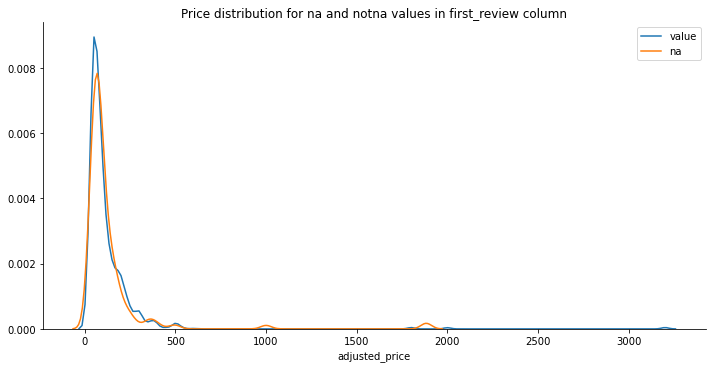

In [22]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(first_review_error_status, hue="first review error status", height = 5, aspect = 2)
g.map(sns.kdeplot, "adjusted_price")
plt.legend()
plt.title('Price distribution for na and notna values in first_review column')
plt.show()

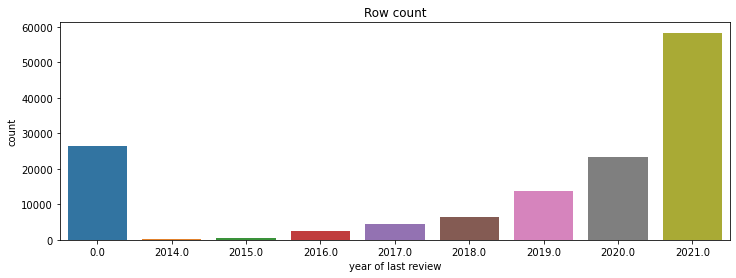

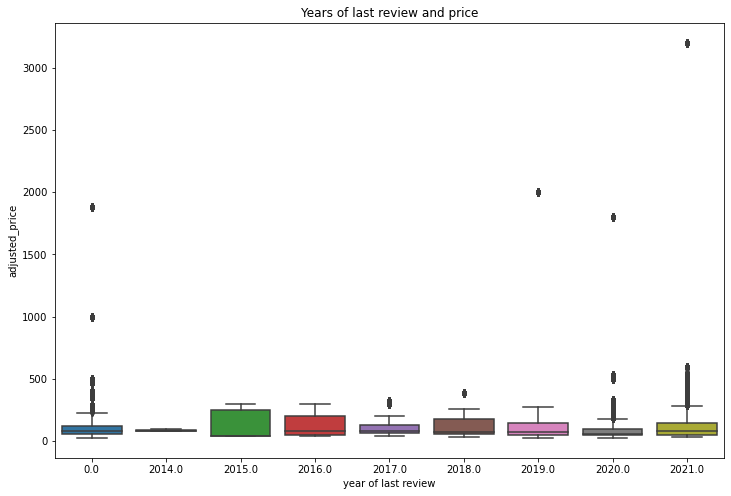

In [23]:
years_of_last_review = pd.DataFrame({
    'year of last review':pd.to_datetime(df_train['last_review'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'adjusted_price': df_train['adjusted_price']
})

plt.figure(figsize=(12,4))
sns.countplot(x="year of last review", data=years_of_last_review)
plt.title('Row count')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(data=years_of_last_review,orient='v', x = 'year of last review', y = 'adjusted_price')
plt.title('Years of last review and price')
plt.show()

In [24]:
popular_property_types = list(df_train['property_type'].value_counts()[df_train['property_type'].value_counts() > 50].index)
popular_property_types

['Private room in house',
 'Entire house',
 'Entire apartment',
 'Private room in apartment',
 'Private room in townhouse',
 'Private room in villa',
 'Entire guesthouse',
 'Private room in bungalow',
 'Entire guest suite',
 'Room in boutique hotel',
 'Entire villa',
 'Private room in condominium',
 'Entire townhouse',
 'Entire condominium',
 'Private room in guest suite',
 'Entire bungalow',
 'Shared room in house',
 'Private room in guesthouse',
 'Private room in bed and breakfast',
 'Private room in tent',
 'Private room in castle',
 'Camper/RV',
 'Shared room in townhouse',
 'Entire cottage',
 'Barn',
 'Entire serviced apartment',
 'Tiny house',
 'Private room in tiny house',
 'Private room in cottage',
 'Room in hotel',
 'Shared room in tent',
 'Entire place',
 'Private room in hut',
 'Shared room in apartment',
 'Entire cabin',
 'Shared room in condominium',
 'Shared room in guesthouse',
 'Shared room']

In [25]:
df_train['property_type'].value_counts()

Private room in house                41160
Entire house                         20294
Entire apartment                      8632
Private room in apartment             7986
Private room in townhouse             7795
Private room in villa                 5779
Entire guesthouse                     5278
Private room in bungalow              4336
Entire guest suite                    3904
Room in boutique hotel                3873
Entire villa                          3274
Private room in condominium           3055
Entire townhouse                      2918
Entire condominium                    2876
Private room in guest suite           2261
Entire bungalow                       2047
Shared room in house                  1635
Private room in guesthouse            1616
Private room in bed and breakfast     1484
Private room in tent                   623
Private room in castle                 616
Camper/RV                              574
Shared room in townhouse               424
Entire cott

In [26]:
df_train['room_type'].value_counts()

Private room       81413
Entire home/apt    51270
Shared room         3026
Name: room_type, dtype: int64

In [27]:
#df_train['cancellation_policy'].value_counts()
#popular_cancellation_policy = list(df_train['cancellation_policy'].value_counts()[df_train['cancellation_policy'].value_counts() > 100].index)
#popular_cancellation_policy

In [28]:
df_train['neighbourhood_cleansed'].value_counts()

Arcadia              35450
Temple City          25347
El Monte             24304
Monrovia             22638
Baldwin Park          6941
Mayflower Village     6926
Sierra Madre          5089
Duarte                4927
North El Monte        2891
Irwindale             1196
Name: neighbourhood_cleansed, dtype: int64

In [29]:
# df_train['host_response_rate'].value_counts()

KeyError: 'host_response_rate'

In [30]:
df_train['review_scores_rating'].value_counts()

5.00    30338
4.50     4774
4.00     4285
4.67     3929
4.86     3046
        ...  
3.77      200
4.99      199
4.26      195
4.47      191
4.27      183
Name: review_scores_rating, Length: 83, dtype: int64

In [31]:
df_train[df_train['bathrooms_text'].isna()]

,id,scrape_id,name,description,host_id,host_since,host_thumbnail_url,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price.x,minimum_nights.x,maximum_nights.x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,available,price.y,adjusted_price,minimum_nights.y,maximum_nights.y
222084,49472937,20210705235432,Arcadia beautiful room with independent bathroom,NaN,290894026,2019-09-02,https://a0.muscache.com/im/pictures/user/05370c16-0733-40f4-8375-f432b1ea3c7a.jpg?aki_policy=profile_small,True,True,Temple City,34.12028,-118.06753,Shared room,Shared room,2,NaN,1.0,1.0,"[""Pool"", ""Long term stays allowed""]",60,30,365,30,30,365,365,30.0,365,True,30,60,90,365,0,0,0,NaN,NaN,NaN,False,4,1,0,3,True,60.0,60.0,30,365
210504,48336328,20210705235432,Small Farm Stay,"Small Farm Stay made for peaceful family gatherings now available for guests. Includes two grills, a Mexican style oven and an area for a fire pit. Animals are off limits.<br /><br /><b>The space</b><br />5 stables but only 1 horse <br />Large open stable used for running horses can be used for bonfire<br />2 grills for meals.<br />1 Mexican style oven<br /><br /><b>Guest access</b><br />All property on listing is accessible except for locked doors.<br /><br /><b>Other things to note</b><br />TV requests available for 60$ extra charge",356716741,2020-07-16,https://a0.muscache.com/im/pictures/user/dc92e281-26c8-4968-b545-f6f2dcf14b85.jpg?aki_policy=profile_small,True,True,El Monte,34.09455,-118.00145,Barn,Entire home/apt,9,NaN,NaN,0.0,"[""Essentials"", ""Hot water"", ""Kitchen"", ""Free street parking"", ""Free parking on premises""]",150,1,1,1,1,1,1,1.0,1,True,0,0,0,0,0,0,0,NaN,NaN,NaN,False,1,1,0,0,False,150.0,150.0,1,1
117062,34396871,20210705235432,Cozy Grandma's Place -- Separate Private Studio,"Come stay at Grandma's! This was my Nonnie's place and it was her wishes for us to rent to guests decorated the way she left it.<br /><br />Note: Shower is in the main house. BUT due to Covid restrictions, you'll have NO access to shower without a vaccine card.<br /><br />Parking ok in the driveway in front of cottage.<br /><br />35 mins to LA or 30 mins to Cal State via Metrolink, a 5 minute walk away. $15 to LAX takes an hour or two depending on the time of day. Convenient, and cheaper than a hotel. Great food nearby.<br /><br /><b>The space</b><br />This is a detached Granny Unit at the end of the driveway. Private. Very cute. No shower or kitchen. Has a toilet and sink, microwave and minifridge.<br /><br />The yard is very much still in progress and we are doing some construction, so you might see piles of board and such. Other people live in the main house and will park in the back.<br /><br /><b>Guest access</b><br />Due to Covid restrictions, you are not allowed to go into the",14916858,2014-04-30,https://a0.muscache.com/im/pictures/user/0a2dccfc-f158-4e9d-af9f-478430892bce.jpg?aki_policy=profile_small,True,True,Baldwin Park,34.08359,-117.96153,Entire guesthouse,Entire home/apt,1,NaN,1.0,1.0,"[""Microwave"", ""Security cameras on property"", ""Heating"", ""TV"", ""Extra pillows and blankets"", ""Hot water"", ""Dishes and silverware"", ""Essentials"", ""Free parking on premises"", ""Hangers"", ""Kitchen"", ""Laundromat nearby"", ""Portable fans"", ""Private entrance"", ""Wifi"", ""Refrigerator"", ""Single level home"", ""Bed linens"", ""Free street parking"", ""Lockbox"", ""Long term stays allowed""]",59,2,28,2,2,1

In [32]:
df_train['bathrooms_text'].value_counts()

1.0    85359
1.5    19215
2.0    13542
2.5     5591
3.0     4312
3.5     2313
0.0     1044
4.0     1020
4.5      829
7.5      217
5.5      209
5.0      198
Name: bathrooms_text, dtype: int64

In [33]:
df_train['host_has_profile_pic'].value_counts()

True     135074
False       201
Name: host_has_profile_pic, dtype: int64

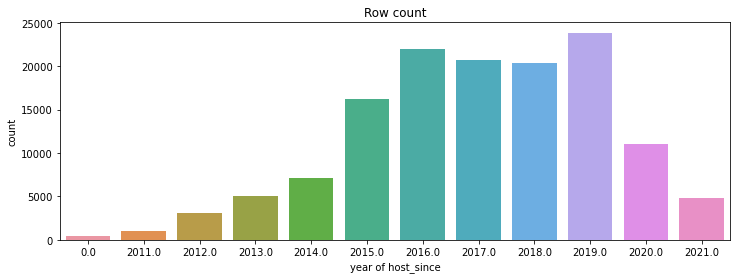

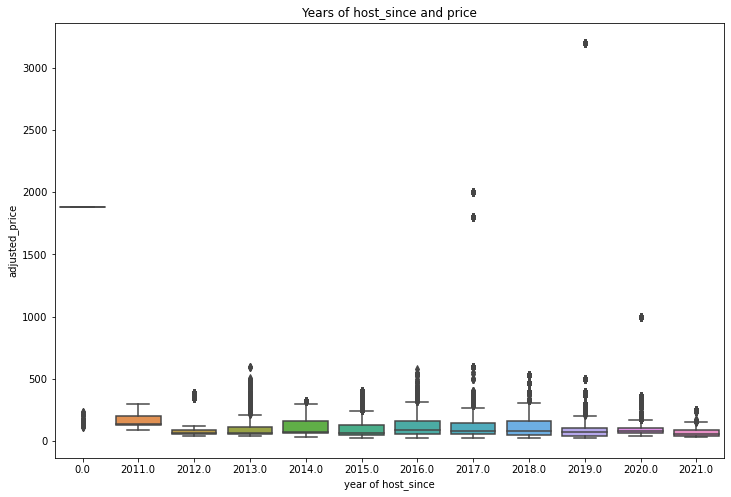

In [34]:
years_of_host_since = pd.DataFrame({
    'year of host_since':pd.to_datetime(df_train['host_since'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'adjusted_price': df_train['adjusted_price']
})

plt.figure(figsize=(12,4))
sns.countplot(x="year of host_since", data=years_of_host_since)
plt.title('Row count')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(data=years_of_host_since,orient='v', x = 'year of host_since', y = 'adjusted_price')
plt.title('Years of host_since and price')
plt.show()

# Price distribution of na values looks like one for 2008 values. I think, best of worst is to use 2008 value to fill na in this situation.

In [35]:
#map

def create_map(neighbourhood_cleansed):
    price_view = lambda x: 'adjusted_price: ' + str(round(x, 2))

    if neighbourhood_cleansed in {'NYC', 'LA'}:
        fraction = 0.2
    else:
        fraction = 0.6
        
    df_temp = df_train[df_train['neighbourhood_cleansed'] == neighbourhood_cleansed].sample(frac=fraction,random_state=101)
    df_temp['adjusted_price'] = np.round(df_temp['adjusted_price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["adjusted_price"],
                            color='adjusted_price', 
                            zoom=10)
    
    fig.update_layout(
            title = f'Airbnb prices in {neighbourhood_cleansed}',
            geo_scope='usa',
            width=1000, 
            height=600,
            mapbox_style="white-bg",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States Geological Survey",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_geos(fitbounds="locations")
    fig.show()
    
neighbourhood_cleansed = interact(lambda x: create_map(x), x=['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'])  #widget
create_map('LA')

interactive(children=(Dropdown(description='x', options=('NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'), value=…

# Outliers handling

In [36]:
price_distr = pd.DataFrame(np.histogram(df_train['adjusted_price'].dropna().values, bins = 50)).T
price_distr.columns = ['#', 'border']
price_distr.dropna(inplace = True)
price_distr.astype({'#': 'int32'})
price_distr

,#,border
0,76695.0,25.0
1,30138.0,88.5
2,14149.0,152.0
3,6096.0,215.5
4,3267.0,279.0
5,2593.0,342.5
6,278.0,406.0
7,1246.0,469.5
8,12.0,533.0
9,66.0,596.5


In [37]:
#df_train[(df_train['adjusted_price'] < 2.5) | (df_train['adjusted_price'] > 7.5)].sort_values(by = 'adjusted_price')

In [38]:
df_train.drop(df_train[df_train['adjusted_price']==0].index, inplace = True)

C:\Users\Humberto\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# For modelling purposes it would be enough to detele just 0 price record

In [39]:
#df_train[df_train['adjusted_price']< 100]

# Data preparation

In [40]:
amenities_set = set()
for amenitie in df_train['amenities']:
    amenitie_set = set(re.sub(r'(\"|\{|\})', '', amenitie).split(','))
    for piece in amenitie_set:
        if "translation missing" not in piece and piece:
            amenities_set.add(piece.strip())
            
amenities_set

{'24\\ TV with Amazon Prime Video',
 '30\\ TV with Roku',
 '32\\ TV with Amazon Prime Video',
 '42\\ HDTV with Amazon Prime Video',
 '46\\ TV with Amazon Prime Video',
 '48\\ HDTV with Chromecast',
 '48\\ TV',
 '50\\ HDTV with Netflix',
 '50\\ TV',
 '55\\ HDTV',
 '55\\ HDTV with Netflix',
 '55\\ HDTV with Roku',
 '55\\ HDTV with premium cable',
 '60\\ TV',
 '60\\ TV with premium cable',
 'Air conditioning',
 'Air conditioning]',
 'Alexa  Bluetooth sound system',
 'Amazon Prime Video',
 'Apple TV',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Baby safety gates',
 'Babysitter recommendations',
 'Backyard',
 'Baking sheet',
 'Baking sheet]',
 'Barbecue utensils',
 'Bathroom essentials',
 'Bathtub',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Bikes',
 'Board games',
 'Body soap',
 'Bose mobile speaker  Bluetooth sound system',
 'Bread maker',
 'Breakfast',
 'Building staff',
 'Cable TV',
 'Carbon monoxide alarm',
 'Ceiling fan',
 'Central air condi

In [ ]:
def dummification(df):
    dummy_df = pd.DataFrame()
    object_cols = ['property_type', 'room_type', 'neighbourhood_cleansed', 'first_review']
    for col in object_cols:
        dummy_df = pd.concat([dummy_df, create_dummy(col, df)], axis = 1)
    
    return pd.concat([df.drop(columns = object_cols), dummy_df], axis = 1)
        
def create_dummy(col, df):
    df_dummy = pd.get_dummies(df[col], drop_first = True)
    df_dummy.columns = ['dum: ' + col + ': ' + name for name in df_dummy.columns]
    return df_dummy

def dum_col_filling(main_col_val, dum_col_name, main_col_name):
    if dum_col_name.replace(main_col_name + ': ', '') in main_col_val:
        return 1
    else:
        return 0

def set_to_dummies(df, column_name):
    all_values_of_sets = amenities_set
    dummy_columns_name = [column_name + ': ' + dum_col for dum_col in all_values_of_sets if dum_col]
    dummy_df = pd.DataFrame(0, index=df.index, columns=dummy_columns_name)
    df = pd.concat([dummy_df, df], axis = 1)
    for dum_col_name in dummy_columns_name:
        for i in df.index:
            df[dum_col_name][i] = dum_col_filling(df[column_name][i], dum_col_name, column_name)
    return df

def property_type_proc(val):
    if val in popular_property_types:
        return val
    else:
        return 'other'
      
def first_review_poc(val):
    if pd.isna(val):
        return 'no data'
    elif datetime.strptime(val,'%Y-%m-%d').year < 2014:
        return ' < 2014'
    else:
        return str(int(datetime.strptime(val,'%Y-%m-%d').year))
    
def unknown_filling(val):
    if pd.isna(val):
        return 'no data'
    else:
        return val

def host_since_proc(val):
    if pd.isna(val):
        return 2008
    else:
        return int(datetime.strptime(val,'%Y-%m-%d').year)

def true_to_1(val):
    if val in {'True', True, 't'}:
        return 1
    else:
        return 0
    
def processing(df):
    df = df.copy()
    df['property_type'] = df['property_type'].apply(property_type_proc)
    df['first_review'] = df['first_review'].apply(first_review_poc)
    df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(unknown_filling)
    df['review_scores_rating'] = df['review_scores_rating'].fillna(0)
    df['bathrooms_text'] = df['bathrooms_text'].fillna(-1)
    df['bedrooms'] = df['bedrooms'].fillna(-1)
    df['beds'] = df['beds'].fillna(-1)
    df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna('f')
    df['host_identity_verified'] = df['host_identity_verified'].fillna('f')
    df['host_since'] = df['host_since'].apply(host_since_proc)
    df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(true_to_1)
    df['host_identity_verified'] = df['host_identity_verified'].apply(true_to_1)
    df['instant_bookable'] = df['instant_bookable'].apply(true_to_1)
    df = set_to_dummies(df, 'amenities')
    df = dummification(df)
    df.drop(['amenities', 'host_thumbnail_url', 'description', 'id', 'last_review', 'name'], axis = 1, inplace = True)
    return df.sort_index(ascending=False, axis=1)

#df_d = processing(df.sample(frac=0.01,random_state=101))
df_d = processing(df_train)
df_d

<ipython-input-41-920826ac3d24>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_d[df_d.isnull().any(axis=1)]

# Modelling

In [ ]:
#adding missing columns to test \ validation sets and deleting unnecessary
columns_needed = set(df_d.columns)
def columns_standardization(df):
    df = df.copy()
    for col in columns_needed:
        if col not in set(df.columns):
            df.insert(loc = len(df.columns), column = col, value = 0, allow_duplicates=False)
    
    for col in set(df.columns):
        if col not in columns_needed:
            df.drop(columns = col, axis = 1, inplace = True)
    
    return df.sort_index(ascending=False, axis=1)

In [ ]:
test = columns_standardization(processing(df_test))
test

In [ ]:
test[test.isnull().any(axis=1)]

In [ ]:
def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)
           


def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

In [ ]:
df_d.info(verbose=True)

In [ ]:
df_d

In [ ]:
df_d = df_d.drop(columns=['host_response_rate'])

In [ ]:
test = test.drop(columns=['host_response_rate'])

In [ ]:
plt.figure(figsize=(140,70))
sns.heatmap(df_d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_d.info(verbose=True)

In [ ]:
df_d = df_d[df_d['adjusted_price'].notna()]

In [ ]:
test = test[test['adjusted_price'].notna()]

In [ ]:
df_d['adjusted_price'].unique()

In [ ]:
test['adjusted_price'].unique()

In [ ]:
df_d.isnull().sum(axis = 0).sort_values(ascending = False).head(60)

In [ ]:
test.isnull().sum(axis = 0).sort_values(ascending = True).head(60)

In [ ]:
lm = LinearRegression(
        n_jobs = -1,
        normalize = True
)

lm.fit(df_d.drop('adjusted_price', axis = 1), df_d['adjusted_price'])

comment = ''

analysis(
    model = lm, 
    X_train = df_d.drop('adjusted_price', axis = 1), 
    X_test = test.drop('adjusted_price', axis = 1), 
    y_train = df_d['adjusted_price'], 
    y_test = test['adjusted_price']
)

In [ ]:
plt.figure(figsize=(140,70))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)
rfm.fit(df_d.drop('adjusted_price', axis = 1), df_d['adjusted_price'])

comment = ''

analysis(
    model = rfm, 
    X_train = df_d.drop('adjusted_price', axis = 1), 
    X_test = test.drop('adjusted_price', axis = 1), 
    y_train = df_d['adjusted_price'], 
    y_test = test['adjusted_price']
)

In [ ]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(df_d.drop('adjusted_price', axis = 1), df_d['adjusted_price'])

comment = ''

analysis(
    model = gbr_model, 
    X_train = df_d.drop('adjusted_price', axis = 1), 
    X_test = test.drop('adjusted_price', axis = 1), 
    y_train = df_d['adjusted_price'], 
    y_test = test['adjusted_price']
)

# Dense neural models

In [ ]:
#scaling
scaler = MinMaxScaler()
scaler.fit(df_d.drop('adjusted_price', axis = 1))
X_train_sc = scaler.transform(df_d.drop('adjusted_price', axis = 1).values)
X_test_sc = scaler.transform(test.drop('adjusted_price', axis = 1).values)
y_train = df_d['adjusted_price'].values
y_test = test['adjusted_price'].values

In [ ]:
nn_model1 = Sequential()


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


nn_model1.add(Dense(64, activation = 'relu'))
nn_model1.add(Dropout(0.1))
nn_model1.add(Dense(1))

nn_model1.compile(
    optimizer='rmsprop',
    loss='mse'
)

nn_model1.fit(
    x = X_train_sc,
    y = y_train,
    epochs = 100,
    validation_data=(X_test_sc, y_test), 
    batch_size = 128,
    callbacks=[es]
)


pd.DataFrame(nn_model1.history.history).plot()
plt.show()

analysis(model = nn_model1, 
         X_train = X_train_sc, 
         X_test = X_test_sc, 
         y_train = y_train, 
         y_test = y_test)

# Using text data from 'description' column

In [ ]:
df_train['description']

In [ ]:
def del_punct(text):
    chars = [char for char in text if char not in string.punctuation]
    return ''.join(chars)

def del_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return words

def text_preparation(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', 'somenumbers', text)
    text = del_stopwords(del_punct(text))
    return text
    
    
text_preparation('Enjoy a beautiful 67 contemporary residence with')

In [ ]:
df_train['description']= df_train['description'].values.astype('U')

In [ ]:
df_test['description']= df_test['description'].values.astype('U')

In [ ]:
#df_train = df_train[df_train['adjusted_price'].notna()]

In [ ]:
bow_transformer = CountVectorizer(analyzer = text_preparation, max_features = 1500).fit(df_train['description'])
bow = bow_transformer.transform(df_train['description'])
bow.shape

In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow)
train_tfidf = tfidf_transformer.transform(bow)

bow_test = bow_transformer.transform(df_test['description'])
test_tfidf = tfidf_transformer.transform(bow_test)

In [ ]:
#df_train = df_train[df_train['adjusted_price'].notna()]

In [ ]:
#df_test = df_test[df_test['adjusted_price'].notna()]

In [ ]:
#df_test['adjusted_price'].unique()

In [ ]:
#df_train['adjusted_price'].unique()

In [ ]:
#df_train['adjusted_price'].shape

In [ ]:
#df_test['adjusted_price'].shape

In [ ]:
#train_tfidf.shape

In [ ]:
#test_tfidf.shape

In [ ]:
rfm_text = RandomForestRegressor(
    max_depth = 10, 
    n_estimators = 500,
    n_jobs = -1, 
    random_state = 101
)
rfm_text.fit(train_tfidf, df_train['adjusted_price'])

comment = ''

analysis(
    model = rfm_text, 
    X_train = train_tfidf, 
    X_test = test_tfidf, 
    y_train = df_train['adjusted_price'], 
    y_test = df_test['adjusted_price']
)

# We can see that there is not much information in description of object, that can be used for price prediction, but we can try use this in general model. As an experiment we can try to create a model, that would we a stack of 2 models - prediction of text model will be used in model built on all available features as one more feature.

In [ ]:
class StackRegression:
    
    def __init__(self, model_general, model_secondary):
        self.model_general = model_general
        self.model_secondary = model_secondary
    
    def fit_predict(self, X_train_general, X_train_secondary, y_train, X_test_general, X_test_secondary, y_test):
        self.model_secondary.fit(X_train_secondary, y_train)
        
        self.secondary_predictions_test =  self.model_secondary.predict(X_test_secondary)
        self.secondary_predictions_train =  self.model_secondary.predict(X_train_secondary)
        
        self.X_train_full = X_train_general.copy()
        self.X_train_full.assign(secondary_model_predictions = self.secondary_predictions_train)
        
        self.X_test_full = X_test_general.copy()
        self.X_test_full.assign(secondary_model_predictions = self.secondary_predictions_test)
                        
        self.model_general.fit(self.X_train_full, y_train)
        
        return self.model_general.predict(self.X_test_full)

In [ ]:
model_general = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)

model_for_text = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)

stack_model = StackRegression(model_general, model_for_text)


prediction_test = stack_model.fit_predict(
    X_train_general = df_d.drop('adjusted_price', axis = 1), 
    X_train_secondary = train_tfidf, 
    y_train = df_d['adjusted_price'], 
    X_test_general = test.drop('adjusted_price', axis = 1), 
    X_test_secondary = test_tfidf, 
    y_test = test['adjusted_price']
)

prediction_train = stack_model.fit_predict(
    X_train_general = df_d.drop('adjusted_price', axis = 1), 
    X_train_secondary = train_tfidf, 
    y_train = df_d['adjusted_price'], 
    X_test_general = df_d.drop('adjusted_price', axis = 1), 
    X_test_secondary = train_tfidf, 
    y_test = df_d['adjusted_price']
)

show_metrics(prediction_test, prediction_train, y_test = test['adjusted_price'], y_train = df_d['adjusted_price'])


sns.regplot(x = test['adjusted_price'], y = prediction_test, fit_reg=False)
plt.title('Prediction and real')
plt.show()

sns.distplot(test['adjusted_price'] - prediction_test, bins = 50)
plt.title('Error variance')
plt.show()

# This model doesn't have an advantage over more simple models. So for final submission I prefer to use just simple RFR

# Validation

In [ ]:
val_data_for_model = columns_standardization(processing(validation_df))
val_data_for_model

In [ ]:
val_data_for_model[val_data_for_model.isnull().any(axis=1)]

In [ ]:
#val_data_for_model

In [ ]:
analysis(
    model = rfm, 
    X_train = df_d.drop('adjusted_price', axis = 1), 
    X_test = val_data_for_model.drop('adjusted_price', axis = 1), 
    y_train = df_d['adjusted_price'], 
    y_test = val_data_for_model['adjusted_price']
)

In [ ]:
#print(val_data_for_model.columns)

In [ ]:
#val_data_for_model.info()